# Solution sketch, Lab 6

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




## 1. Simulating uncertainty of sample means

Say that we want to estimate the mean height of female business students in Norway. We gather a sample of 100 students and find that the sample mean is 160cm and the standard deviation of our sample is 10. 

a. Using a simulation with 10.000 runs, generate a distribution of the sample means. Show a histogram of the distribution of sample means and calculate the the standard error (the standard deviation of the distribution of sample means). Calculate a 95% confidence interval for the sample means. How does this compare to the analytic solution ($SE_{mean} = \frac{\sigma}{\sqrt(S)}$)

b. Now we also gather 100 male business students in Norway and measure their height. We get a sample mean of 178 and a standard deviation of 12. Simulate a distribution for the difference in sample means between males and females and calculate the standard error. 

# Solution Sketch

Standard Error of sample means 0.9997647853146623


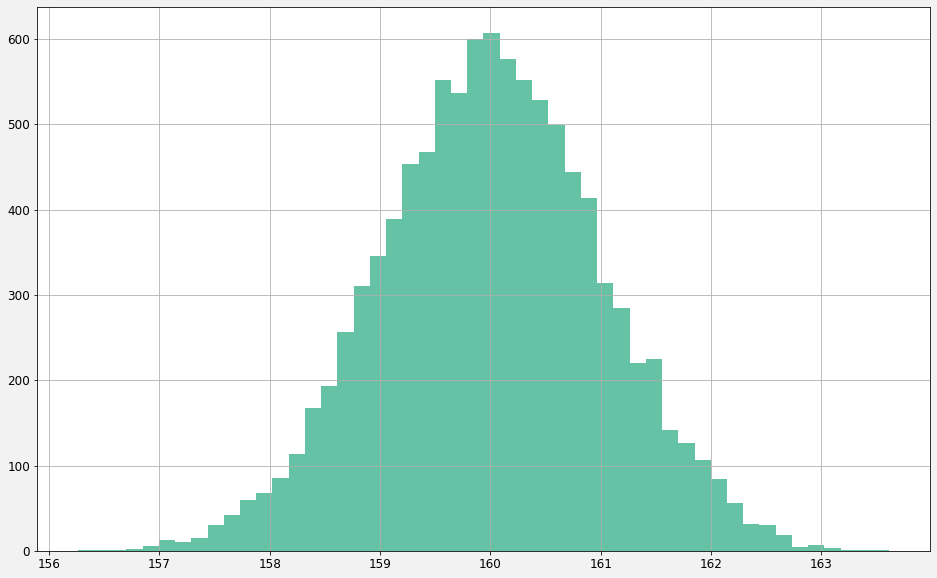

In [20]:
# first the distribution of sample means for female students
nsims = 10000
n=100
mu_female = 160
sigma_female = 10
#[s for ]

smeans_female = np.array([np.random.normal(mu_female, sigma_female, n).mean() for i in range(nsims)])
pd.Series(smeans_female).hist(bins=50)

#Standard error: 
SE_f = smeans_female.std(ddof=1)
print("Standard Error of sample means", SE_f)

In [21]:
#Then we can find an approximate 95% confidence interval by calculating +/- 2*SE:

CI_low = mu_female - 2*SE_f
CI_high = mu_female + 2*SE_f

print("CI", CI_low, CI_high)

# We could also do in a more direct way be finding the quantiles in our sample mean distribution: 

CI_low2 = np.quantile(smeans_female,.025)
CI_high2 = np.quantile(smeans_female,.975)

print("CI direct method", CI_low2, CI_high2)

CI 158.00047042937067 161.99952957062933
CI direct method 158.0277750352954 161.976231253897


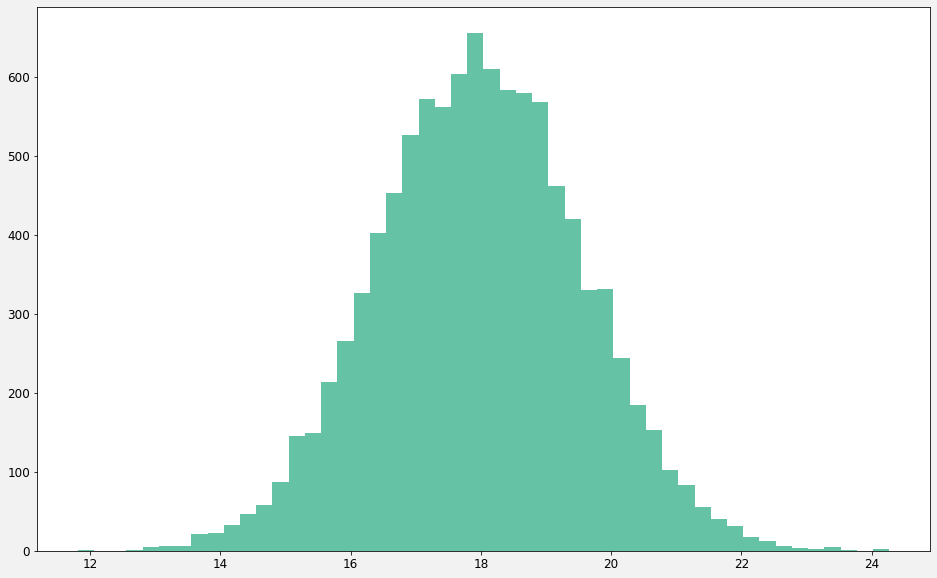

In [22]:
#b. generate differences in sample means

def diffOfMean(x1, x2):
    return(x1.mean()-x2.mean())

diffOfMeans_sim = np.array([diffOfMean(np.random.normal(178,12,100),np.random.normal(160,10,100)) for i in range(nsims)])

fig, ax = plt.subplots()
ax.hist(diffOfMeans_sim, bins=50)
plt.show()

In [23]:
SE_diff = diffOfMeans_sim.std(ddof=1)
print("SE of difference in means", SE_diff)

SE of difference in means 1.565656853256787


## 2. Confidence intervals using normal and t-distributions

Generate a small sample of 5 random values from a normal distribution with mean $\mu=30$ and standard deviation $\sigma=5$.

a. Calculate the mean of the sample, and then calculate estimated 95% confidence intervals for the sample mean based on the normal and t-distribution (HINT: You can use the function sts.t.interval(), and sts.norm.intervall() to automatically create intervals given a sample mean and standard error of the sample mean.)


b. Now run a simulation (with, say 10.000 simulations). Within each simulation, create a random sample with n=5, calculate confidence intervals with both normal and t-distribution and then test whether these intervals contains the *true* sample mean. Save this result (either as a *True/False* value or *1/0* value). In what percentage of the simulations do the confidence intervals include the true value for the normal and t approximations?

c. Do the same steps above when the sample size is n=30

# Solution sketch

In [17]:
#a

n=5
nsim=10000
mu=30
sigma=5

In [11]:
smallSample = np.random.normal(mu,sigma,n)
meanSS = smallSample.mean()
SE_SS = smallSample.std(ddof=1)/np.sqrt(n-1)

CI_Normal = spt.norm.interval(.95,meanSS,SE_SS)
CI_T = spt.t.interval(.95,n-1,meanSS,SE_SS)
print("CI (normal approx)", CI_Normal)
print("CI (t approx)", CI_T)

CI (normal approx) (24.119513201952515, 35.26556026706042)
CI (t approx) (21.797904980983372, 37.58716848802957)


In [18]:
normalTrue = []
tTrue = []
for sim in range(nsim):
    smallSample = np.random.normal(mu,sigma,n)
    meanSS = smallSample.mean()
    SE_SS = smallSample.std(ddof=1)/np.sqrt(n-1)

    CI_normal = spt.norm.interval(.95,meanSS,SE_SS)
    CI_t = spt.t.interval(.95,n-1,meanSS,SE_SS)
    
    normalTrue.append((CI_normal[0] < mu) & (CI_normal[1] > mu))
    tTrue.append((CI_t[0] < mu) & (CI_t[1] > mu))

In [19]:
print(np.array(normalTrue).mean())
print(np.array(tTrue).mean())

0.9031
0.9648


# 3. Hypothesis testing, p-values and Cochrane reports

One of the best tools for understanding and interpreting the available scientific information on medicine and health are the [Cochrane Reports](https://www.cochrane.org/). This non-profit group looks through the literature on medical and health studies and tries to summarize the available evidence on a certain topic,  making use of robust statistical methodologies. 

Let's consider the [available evidence for exercise as treatment for coronary heart disease](https://www.cochrane.org/CD001800/VASC_exercise-based-rehabilitation-coronary-heart-disease).

a. Read the report linked to above. In the main results, how does Cochrane report the results? What statistical concepts do they use? What type of language is used to report results? Are the effects big or small?

Now let's consider one particular study that comes from NTNU's own [Cardiac Exercise Research Group (CERG)](https://www.ntnu.edu/cerg). This study wanted to test to see if [intervall training reduces plaque in heart patients](https://www.ntnu.edu/cerg/publications#9-22). They chose 60 participants who had recently been treated for coronary heart disease and split the group into a treatment group (30 participants) and controll group (30 participants), where the treatment group performed high-intensity interval training twice weekly for 6 months under supervision. The control group were instructed to carry on as before with general exercise advice. Of the initial treatment group n=20 stayed in the program for the full 6 months, and n=29 of the control group were followed up. 


From [table 2 of the research article](https://www.ahajournals.org/doi/full/10.1161/JAHA.121.024705) For the treatment group, a measure of artery plaque before the exercise program began reported a mean score of 357 with a standard deviation of 136. After 6 months the same group had a mean value of 306 with a standard deviation of 150. 

b. Calculate the difference in means between before ("baseline") and after ("Follow-up") and provide a standard error of the estimate. Create a 95% confidence interval.

c. If the null hypothesis is that exercise had no effect, what is the p-value of the result? Interpret the p-value.

d. Under a hypothesis testing frameworks, we usually set a significance level at 5%. Would we reject the null hypothesis under this significance level. In this case, would we reject the null-hypothesis. Discuss the problems of hypothesis testing and p-values in relation to this study. 



# Solution sketch

a. There are many potential answers here, but a few things could have been touched on: 
    - They report results not as single point estimates (risk of death goes down by 12%), but rather as confidence intervals (between 8% and 15%), which better represents the uncertainty. 
    - They don't just present p-values, but rather talk about the overall strength and robustness of the results. This includes considering the design of the experiment, the number of studies, the number of observations/patients in each study, the effect size, and the consistency of the effect across studies.
    - The Cochrane report finds large and robust effects for exercise on reducing the risk of heart-attack ("MI") as well as "All-cause hospitalisation", but a smaller and less certain effect on "all-cause mortality".

In [24]:
# difference in means would be: 
theta_hat = 306-357

#We can use the formula for standard error for a difference in means

SE_hat = np.sqrt(136**2/20 +  150**2/20)

print("mean difference before/after:", theta_hat)
print("SE", SE_hat)

#Or we can simulate our answers
nsim=10000

preSims = np.array([np.mean(np.random.normal(357, 136, 20)) for i in range(nsim)])
postSims = np.array([np.mean(np.random.normal(306, 150, 20)) for i in range(nsim)])
theta_sims = postSims-preSims

SE_sim = theta_sims.std()
print("Sim SE", SE_sim)

mean difference before/after: -51
SE 45.274717006293926
Sim SE 44.9576682150095


In [25]:
#We can use our cumulative distribution function, which adds up all the probability
#from the left-side of the distribution upto our test statistic
p_value = spt.norm(0,SE_hat).cdf(theta_hat)
print(p_value)

#or by simulating from a null distribution: 

nsims=100000
null_dist = pd.Series(np.random.normal(0, SE_hat, nsims))
null_dist[null_dist<theta_hat].count()/nsims

0.12998616813248115


0.12928

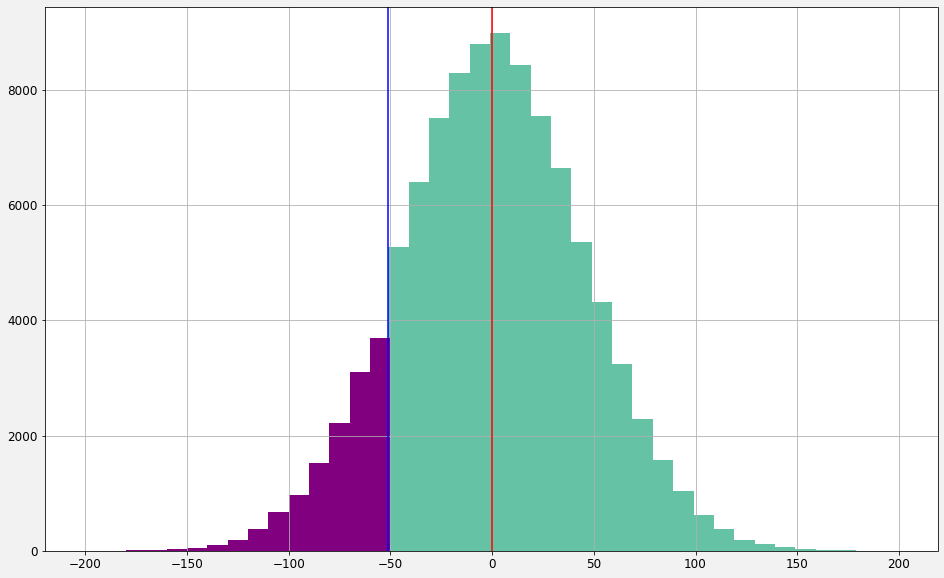

In [40]:
fig, ax = plt.subplots()
null_dist[null_dist>theta_hat].hist(ax=ax, bins=np.arange(theta_hat, 200,10))
null_dist[null_dist<=theta_hat].hist(color="purple", ax=ax, bins=np.arange(-200,theta_hat+10,10))

ax.axvline(x=0, color="red")
ax.axvline(x=theta_hat, color="blue")

So we can interpret this as under the null-hypothesis (0 change in lipids), then we would get this test statistic about 13% of the time. Typically, we would want a p-value of above .05 or so to say we have a statistically significant result. (Note, in the research article, the researchers use regression analysis to add precision (reduce the standard error) to these estimates, and end up with a lower p-value and more significant result.)

#d

I would refer to the discussion here of ROS 4.4-4.6. As it happens, in the refined results in this paper using regression analysis, the estimate for the change in lips (LCBI) was -47.7 with a p-value of .075, which is over our significance threshold of 5%. Yet it would be wrong to conclude that exercise has no effect on lipids. 

Rather, the results actually provide some evidence for an effect, but we have some uncertainty because the number of patients/observations is quite low (n=20) and there is quite high variation (reflected in the initial standard deviations of the groups). 

The beauty of the Cochrane reports, is that it can combine many such studies as the one we have looked at here and aggregate the results (what is called a "meta study", and come up with some conclusions based on my studies with in total many patients). 